<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9734712	total: 63.3ms	remaining: 1m 3s
1:	learn: 0.9527781	total: 67ms	remaining: 33.4s
2:	learn: 0.9314360	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9154941	total: 73.8ms	remaining: 18.4s
4:	learn: 0.8971268	total: 77.2ms	remaining: 15.4s
5:	learn: 0.8810450	total: 80.3ms	remaining: 13.3s
6:	learn: 0.8637179	total: 83.6ms	remaining: 11.9s
7:	learn: 0.8454934	total: 86.8ms	remaining: 10.8s
8:	learn: 0.8301501	total: 89.9ms	remaining: 9.9s
9:	learn: 0.8143869	total: 93ms	remaining: 9.21s
10:	learn: 0.7988985	total: 96.2ms	remaining: 8.65s
11:	learn: 0.7838111	total: 99.6ms	remaining: 8.2s
12:	learn: 0.7689221	total: 103ms	remaining: 7.79s
13:	learn: 0.7541608	total: 105ms	remaining: 7.4s
14:	learn: 0.7421687	total: 108ms	remaining: 7.11s
15:	learn: 0.7278493	total: 111ms	remaining: 6.82s
16:	learn: 0.7147443	total: 114ms	remaining: 6.59s
17:	learn: 0.7025535	total: 116ms	remaining: 6.35s
18:	learn: 0.6909567	total: 120ms	remaining: 6.2s
19:	lear

32:	learn: 0.5538095	total: 164ms	remaining: 4.81s
33:	learn: 0.5462641	total: 169ms	remaining: 4.8s
34:	learn: 0.5405253	total: 219ms	remaining: 6.03s
35:	learn: 0.5334570	total: 223ms	remaining: 5.97s
36:	learn: 0.5275030	total: 225ms	remaining: 5.87s
37:	learn: 0.5207381	total: 235ms	remaining: 5.96s


38:	learn: 0.5135388	total: 262ms	remaining: 6.46s
39:	learn: 0.5062400	total: 291ms	remaining: 6.98s
40:	learn: 0.5001544	total: 298ms	remaining: 6.98s
41:	learn: 0.4926844	total: 302ms	remaining: 6.88s
42:	learn: 0.4876687	total: 309ms	remaining: 6.89s
43:	learn: 0.4825087	total: 316ms	remaining: 6.86s
44:	learn: 0.4773398	total: 325ms	remaining: 6.9s


45:	learn: 0.4709766	total: 463ms	remaining: 9.6s
46:	learn: 0.4643461	total: 487ms	remaining: 9.88s
47:	learn: 0.4580980	total: 503ms	remaining: 9.97s
48:	learn: 0.4517417	total: 508ms	remaining: 9.85s
49:	learn: 0.4463036	total: 510ms	remaining: 9.7s
50:	learn: 0.4407132	total: 513ms	remaining: 9.54s
51:	learn: 0.4365200	total: 516ms	remaining: 9.4s
52:	learn: 0.4308712	total: 519ms	remaining: 9.28s
53:	learn: 0.4267849	total: 522ms	remaining: 9.15s
54:	learn: 0.4224955	total: 530ms	remaining: 9.11s
55:	learn: 0.4193001	total: 534ms	remaining: 9.01s
56:	learn: 0.4142958	total: 539ms	remaining: 8.91s
57:	learn: 0.4101373	total: 541ms	remaining: 8.79s
58:	learn: 0.4058189	total: 545ms	remaining: 8.69s
59:	learn: 0.4017399	total: 549ms	remaining: 8.6s
60:	learn: 0.3981188	total: 556ms	remaining: 8.56s
61:	learn: 0.3938959	total: 565ms	remaining: 8.54s
62:	learn: 0.3910483	total: 567ms	remaining: 8.44s
63:	learn: 0.3878867	total: 571ms	remaining: 8.35s
64:	learn: 0.3845214	total: 583ms	r

65:	learn: 0.3811601	total: 604ms	remaining: 8.55s
66:	learn: 0.3776149	total: 608ms	remaining: 8.47s
67:	learn: 0.3751243	total: 611ms	remaining: 8.38s
68:	learn: 0.3724394	total: 617ms	remaining: 8.33s
69:	learn: 0.3698235	total: 622ms	remaining: 8.26s
70:	learn: 0.3664951	total: 625ms	remaining: 8.18s
71:	learn: 0.3643800	total: 652ms	remaining: 8.4s
72:	learn: 0.3612018	total: 655ms	remaining: 8.31s
73:	learn: 0.3582410	total: 672ms	remaining: 8.41s
74:	learn: 0.3561240	total: 678ms	remaining: 8.37s
75:	learn: 0.3529896	total: 684ms	remaining: 8.31s
76:	learn: 0.3496480	total: 693ms	remaining: 8.31s
77:	learn: 0.3470150	total: 695ms	remaining: 8.21s
78:	learn: 0.3439361	total: 697ms	remaining: 8.13s
79:	learn: 0.3415290	total: 700ms	remaining: 8.05s
80:	learn: 0.3389940	total: 704ms	remaining: 7.98s
81:	learn: 0.3360233	total: 707ms	remaining: 7.92s
82:	learn: 0.3344916	total: 711ms	remaining: 7.86s
83:	learn: 0.3317361	total: 715ms	remaining: 7.79s
84:	learn: 0.3293829	total: 718m

90:	learn: 0.3155177	total: 739ms	remaining: 7.38s
91:	learn: 0.3139126	total: 743ms	remaining: 7.33s
92:	learn: 0.3122988	total: 746ms	remaining: 7.28s
93:	learn: 0.3104664	total: 750ms	remaining: 7.23s
94:	learn: 0.3083285	total: 754ms	remaining: 7.18s
95:	learn: 0.3071172	total: 757ms	remaining: 7.13s
96:	learn: 0.3057045	total: 760ms	remaining: 7.08s
97:	learn: 0.3041431	total: 764ms	remaining: 7.03s
98:	learn: 0.3027914	total: 768ms	remaining: 6.99s
99:	learn: 0.3012768	total: 771ms	remaining: 6.94s
100:	learn: 0.2997017	total: 777ms	remaining: 6.91s
101:	learn: 0.2978866	total: 780ms	remaining: 6.86s
102:	learn: 0.2963931	total: 783ms	remaining: 6.82s
103:	learn: 0.2946640	total: 786ms	remaining: 6.77s
104:	learn: 0.2935310	total: 790ms	remaining: 6.73s
105:	learn: 0.2918390	total: 794ms	remaining: 6.7s
106:	learn: 0.2898148	total: 797ms	remaining: 6.65s
107:	learn: 0.2875763	total: 800ms	remaining: 6.61s
108:	learn: 0.2860255	total: 813ms	remaining: 6.65s
109:	learn: 0.2846096	t

110:	learn: 0.2829807	total: 919ms	remaining: 7.36s
111:	learn: 0.2818597	total: 922ms	remaining: 7.31s
112:	learn: 0.2804203	total: 925ms	remaining: 7.26s
113:	learn: 0.2790289	total: 928ms	remaining: 7.21s
114:	learn: 0.2775044	total: 931ms	remaining: 7.16s
115:	learn: 0.2758375	total: 940ms	remaining: 7.17s
116:	learn: 0.2742307	total: 945ms	remaining: 7.13s
117:	learn: 0.2730565	total: 948ms	remaining: 7.08s
118:	learn: 0.2717863	total: 951ms	remaining: 7.04s
119:	learn: 0.2707936	total: 954ms	remaining: 7s
120:	learn: 0.2695153	total: 957ms	remaining: 6.95s
121:	learn: 0.2685613	total: 960ms	remaining: 6.91s
122:	learn: 0.2675158	total: 967ms	remaining: 6.9s
123:	learn: 0.2654526	total: 971ms	remaining: 6.86s
124:	learn: 0.2644628	total: 976ms	remaining: 6.83s
125:	learn: 0.2633532	total: 979ms	remaining: 6.79s
126:	learn: 0.2622887	total: 982ms	remaining: 6.75s
127:	learn: 0.2613565	total: 984ms	remaining: 6.71s
128:	learn: 0.2599518	total: 987ms	remaining: 6.66s
129:	learn: 0.25

147:	learn: 0.2418676	total: 1.04s	remaining: 5.97s
148:	learn: 0.2409356	total: 1.04s	remaining: 5.95s
149:	learn: 0.2401354	total: 1.04s	remaining: 5.92s
150:	learn: 0.2395756	total: 1.05s	remaining: 5.88s
151:	learn: 0.2389184	total: 1.05s	remaining: 5.85s
152:	learn: 0.2381923	total: 1.05s	remaining: 5.82s
153:	learn: 0.2374344	total: 1.05s	remaining: 5.79s
154:	learn: 0.2364455	total: 1.06s	remaining: 5.76s
155:	learn: 0.2356343	total: 1.06s	remaining: 5.73s
156:	learn: 0.2347102	total: 1.06s	remaining: 5.71s
157:	learn: 0.2340327	total: 1.07s	remaining: 5.68s
158:	learn: 0.2332114	total: 1.07s	remaining: 5.66s
159:	learn: 0.2326534	total: 1.07s	remaining: 5.63s
160:	learn: 0.2319002	total: 1.07s	remaining: 5.6s
161:	learn: 0.2309023	total: 1.08s	remaining: 5.57s
162:	learn: 0.2301537	total: 1.08s	remaining: 5.54s
163:	learn: 0.2291824	total: 1.08s	remaining: 5.52s
164:	learn: 0.2283788	total: 1.08s	remaining: 5.49s
165:	learn: 0.2275159	total: 1.09s	remaining: 5.46s
166:	learn: 0

184:	learn: 0.2147314	total: 1.27s	remaining: 5.58s
185:	learn: 0.2142314	total: 1.28s	remaining: 5.59s
186:	learn: 0.2134548	total: 1.28s	remaining: 5.57s
187:	learn: 0.2126795	total: 1.28s	remaining: 5.55s
188:	learn: 0.2119084	total: 1.29s	remaining: 5.53s
189:	learn: 0.2114668	total: 1.29s	remaining: 5.52s
190:	learn: 0.2107194	total: 1.3s	remaining: 5.5s
191:	learn: 0.2102852	total: 1.3s	remaining: 5.48s
192:	learn: 0.2098272	total: 1.3s	remaining: 5.45s
193:	learn: 0.2093666	total: 1.31s	remaining: 5.43s
194:	learn: 0.2086627	total: 1.31s	remaining: 5.4s
195:	learn: 0.2079177	total: 1.31s	remaining: 5.38s
196:	learn: 0.2071551	total: 1.31s	remaining: 5.36s
197:	learn: 0.2064151	total: 1.32s	remaining: 5.33s
198:	learn: 0.2059075	total: 1.32s	remaining: 5.31s
199:	learn: 0.2052034	total: 1.32s	remaining: 5.29s
200:	learn: 0.2046305	total: 1.32s	remaining: 5.26s
201:	learn: 0.2040921	total: 1.33s	remaining: 5.24s
202:	learn: 0.2037428	total: 1.33s	remaining: 5.23s
203:	learn: 0.203

228:	learn: 0.1905694	total: 1.4s	remaining: 4.7s
229:	learn: 0.1903314	total: 1.4s	remaining: 4.68s
230:	learn: 0.1901397	total: 1.4s	remaining: 4.67s
231:	learn: 0.1894550	total: 1.4s	remaining: 4.65s
232:	learn: 0.1890755	total: 1.41s	remaining: 4.63s
233:	learn: 0.1885466	total: 1.41s	remaining: 4.62s
234:	learn: 0.1880737	total: 1.41s	remaining: 4.6s
235:	learn: 0.1874792	total: 1.42s	remaining: 4.58s
236:	learn: 0.1869418	total: 1.42s	remaining: 4.57s
237:	learn: 0.1866287	total: 1.42s	remaining: 4.55s
238:	learn: 0.1861572	total: 1.43s	remaining: 4.54s
239:	learn: 0.1855905	total: 1.43s	remaining: 4.52s
240:	learn: 0.1850546	total: 1.43s	remaining: 4.51s
241:	learn: 0.1847888	total: 1.44s	remaining: 4.5s
242:	learn: 0.1844327	total: 1.44s	remaining: 4.49s
243:	learn: 0.1839436	total: 1.44s	remaining: 4.47s
244:	learn: 0.1837251	total: 1.44s	remaining: 4.45s
245:	learn: 0.1834855	total: 1.45s	remaining: 4.44s
246:	learn: 0.1831715	total: 1.45s	remaining: 4.42s
247:	learn: 0.18279

294:	learn: 0.1615012	total: 1.58s	remaining: 3.77s
295:	learn: 0.1612821	total: 1.58s	remaining: 3.76s
296:	learn: 0.1608303	total: 1.58s	remaining: 3.74s
297:	learn: 0.1605292	total: 1.58s	remaining: 3.73s
298:	learn: 0.1603514	total: 1.59s	remaining: 3.72s
299:	learn: 0.1601686	total: 1.59s	remaining: 3.71s
300:	learn: 0.1599031	total: 1.59s	remaining: 3.7s
301:	learn: 0.1595919	total: 1.59s	remaining: 3.69s
302:	learn: 0.1591642	total: 1.6s	remaining: 3.67s
303:	learn: 0.1586732	total: 1.6s	remaining: 3.67s
304:	learn: 0.1583222	total: 1.6s	remaining: 3.66s
305:	learn: 0.1578744	total: 1.61s	remaining: 3.65s
306:	learn: 0.1576729	total: 1.61s	remaining: 3.64s
307:	learn: 0.1570797	total: 1.61s	remaining: 3.63s
308:	learn: 0.1568457	total: 1.61s	remaining: 3.61s
309:	learn: 0.1564844	total: 1.62s	remaining: 3.6s
310:	learn: 0.1561011	total: 1.62s	remaining: 3.59s
311:	learn: 0.1558530	total: 1.62s	remaining: 3.58s
312:	learn: 0.1554674	total: 1.63s	remaining: 3.57s
313:	learn: 0.155

365:	learn: 0.1388731	total: 1.74s	remaining: 3.02s
366:	learn: 0.1386716	total: 1.74s	remaining: 3.01s
367:	learn: 0.1385816	total: 1.75s	remaining: 3s
368:	learn: 0.1381488	total: 1.75s	remaining: 2.99s
369:	learn: 0.1377921	total: 1.75s	remaining: 2.98s
370:	learn: 0.1373563	total: 1.75s	remaining: 2.98s
371:	learn: 0.1370242	total: 1.76s	remaining: 2.97s
372:	learn: 0.1366519	total: 1.76s	remaining: 2.96s
373:	learn: 0.1365679	total: 1.76s	remaining: 2.95s
374:	learn: 0.1363173	total: 1.76s	remaining: 2.94s
375:	learn: 0.1361870	total: 1.76s	remaining: 2.93s
376:	learn: 0.1356561	total: 1.77s	remaining: 2.92s
377:	learn: 0.1352905	total: 1.77s	remaining: 2.91s
378:	learn: 0.1351723	total: 1.77s	remaining: 2.9s
379:	learn: 0.1347316	total: 1.77s	remaining: 2.89s
380:	learn: 0.1345513	total: 1.77s	remaining: 2.88s
381:	learn: 0.1343608	total: 1.78s	remaining: 2.87s
382:	learn: 0.1341076	total: 1.78s	remaining: 2.87s
383:	learn: 0.1337092	total: 1.78s	remaining: 2.86s
384:	learn: 0.13

439:	learn: 0.1201269	total: 1.92s	remaining: 2.45s
440:	learn: 0.1197863	total: 1.93s	remaining: 2.44s
441:	learn: 0.1195117	total: 1.93s	remaining: 2.44s
442:	learn: 0.1192641	total: 1.93s	remaining: 2.43s
443:	learn: 0.1190950	total: 1.93s	remaining: 2.42s
444:	learn: 0.1189566	total: 1.93s	remaining: 2.41s
445:	learn: 0.1187808	total: 1.94s	remaining: 2.4s
446:	learn: 0.1187061	total: 1.94s	remaining: 2.4s
447:	learn: 0.1186233	total: 1.94s	remaining: 2.39s
448:	learn: 0.1185550	total: 1.94s	remaining: 2.38s
449:	learn: 0.1182821	total: 1.94s	remaining: 2.38s
450:	learn: 0.1180907	total: 1.95s	remaining: 2.37s
451:	learn: 0.1180212	total: 1.95s	remaining: 2.36s
452:	learn: 0.1177934	total: 1.95s	remaining: 2.35s
453:	learn: 0.1174621	total: 1.95s	remaining: 2.35s
454:	learn: 0.1172784	total: 1.95s	remaining: 2.34s
455:	learn: 0.1170344	total: 1.96s	remaining: 2.33s
456:	learn: 0.1167153	total: 1.96s	remaining: 2.33s
457:	learn: 0.1165728	total: 1.96s	remaining: 2.32s
458:	learn: 0.

502:	learn: 0.1079214	total: 2.1s	remaining: 2.07s
503:	learn: 0.1077027	total: 2.1s	remaining: 2.07s
504:	learn: 0.1076011	total: 2.1s	remaining: 2.06s
505:	learn: 0.1073185	total: 2.11s	remaining: 2.06s
506:	learn: 0.1071923	total: 2.11s	remaining: 2.05s
507:	learn: 0.1070339	total: 2.11s	remaining: 2.04s
508:	learn: 0.1069466	total: 2.11s	remaining: 2.04s
509:	learn: 0.1067988	total: 2.11s	remaining: 2.03s
510:	learn: 0.1065515	total: 2.12s	remaining: 2.02s
511:	learn: 0.1063273	total: 2.12s	remaining: 2.02s
512:	learn: 0.1061827	total: 2.12s	remaining: 2.01s
513:	learn: 0.1061252	total: 2.12s	remaining: 2.01s
514:	learn: 0.1058978	total: 2.12s	remaining: 2s
515:	learn: 0.1056937	total: 2.13s	remaining: 1.99s
516:	learn: 0.1054861	total: 2.13s	remaining: 1.99s
517:	learn: 0.1054268	total: 2.13s	remaining: 1.98s
518:	learn: 0.1053839	total: 2.13s	remaining: 1.97s
519:	learn: 0.1051752	total: 2.13s	remaining: 1.97s
520:	learn: 0.1049156	total: 2.13s	remaining: 1.96s
521:	learn: 0.1047

583:	learn: 0.0934916	total: 2.27s	remaining: 1.62s
584:	learn: 0.0932931	total: 2.27s	remaining: 1.61s
585:	learn: 0.0931569	total: 2.28s	remaining: 1.61s
586:	learn: 0.0930664	total: 2.28s	remaining: 1.6s
587:	learn: 0.0928257	total: 2.28s	remaining: 1.6s
588:	learn: 0.0927129	total: 2.29s	remaining: 1.59s
589:	learn: 0.0924905	total: 2.29s	remaining: 1.59s
590:	learn: 0.0922698	total: 2.29s	remaining: 1.58s
591:	learn: 0.0920823	total: 2.29s	remaining: 1.58s
592:	learn: 0.0918215	total: 2.29s	remaining: 1.57s
593:	learn: 0.0915951	total: 2.3s	remaining: 1.57s
594:	learn: 0.0914300	total: 2.3s	remaining: 1.56s
595:	learn: 0.0912655	total: 2.3s	remaining: 1.56s
596:	learn: 0.0911067	total: 2.31s	remaining: 1.56s
597:	learn: 0.0908732	total: 2.31s	remaining: 1.55s
598:	learn: 0.0908338	total: 2.31s	remaining: 1.55s
599:	learn: 0.0907073	total: 2.31s	remaining: 1.54s
600:	learn: 0.0905130	total: 2.32s	remaining: 1.54s
601:	learn: 0.0903235	total: 2.32s	remaining: 1.53s
602:	learn: 0.090

654:	learn: 0.0830205	total: 2.45s	remaining: 1.29s
655:	learn: 0.0828788	total: 2.45s	remaining: 1.29s
656:	learn: 0.0828047	total: 2.46s	remaining: 1.28s
657:	learn: 0.0827417	total: 2.46s	remaining: 1.28s
658:	learn: 0.0824994	total: 2.46s	remaining: 1.27s
659:	learn: 0.0823439	total: 2.46s	remaining: 1.27s
660:	learn: 0.0822179	total: 2.46s	remaining: 1.26s
661:	learn: 0.0820653	total: 2.46s	remaining: 1.26s
662:	learn: 0.0818564	total: 2.47s	remaining: 1.25s
663:	learn: 0.0816885	total: 2.47s	remaining: 1.25s
664:	learn: 0.0815557	total: 2.47s	remaining: 1.24s
665:	learn: 0.0813660	total: 2.47s	remaining: 1.24s
666:	learn: 0.0812915	total: 2.47s	remaining: 1.24s
667:	learn: 0.0812328	total: 2.48s	remaining: 1.23s
668:	learn: 0.0811076	total: 2.48s	remaining: 1.23s
669:	learn: 0.0810225	total: 2.48s	remaining: 1.22s
670:	learn: 0.0809257	total: 2.48s	remaining: 1.22s
671:	learn: 0.0807279	total: 2.48s	remaining: 1.21s
672:	learn: 0.0805580	total: 2.49s	remaining: 1.21s
673:	learn: 

737:	learn: 0.0722059	total: 2.63s	remaining: 934ms
738:	learn: 0.0720582	total: 2.63s	remaining: 930ms
739:	learn: 0.0719070	total: 2.64s	remaining: 927ms
740:	learn: 0.0717352	total: 2.64s	remaining: 923ms
741:	learn: 0.0716373	total: 2.64s	remaining: 919ms
742:	learn: 0.0714937	total: 2.64s	remaining: 915ms
743:	learn: 0.0713357	total: 2.65s	remaining: 911ms
744:	learn: 0.0711666	total: 2.65s	remaining: 907ms
745:	learn: 0.0710769	total: 2.65s	remaining: 903ms
746:	learn: 0.0709820	total: 2.65s	remaining: 899ms
747:	learn: 0.0708531	total: 2.66s	remaining: 895ms
748:	learn: 0.0707119	total: 2.66s	remaining: 892ms
749:	learn: 0.0706222	total: 2.66s	remaining: 888ms
750:	learn: 0.0705451	total: 2.66s	remaining: 884ms
751:	learn: 0.0704713	total: 2.67s	remaining: 879ms
752:	learn: 0.0703127	total: 2.67s	remaining: 875ms
753:	learn: 0.0701539	total: 2.67s	remaining: 871ms
754:	learn: 0.0700330	total: 2.67s	remaining: 867ms
755:	learn: 0.0699432	total: 2.67s	remaining: 863ms
756:	learn: 

812:	learn: 0.0650132	total: 2.8s	remaining: 644ms
813:	learn: 0.0649537	total: 2.8s	remaining: 640ms
814:	learn: 0.0648511	total: 2.8s	remaining: 636ms
815:	learn: 0.0647446	total: 2.81s	remaining: 633ms
816:	learn: 0.0646022	total: 2.81s	remaining: 629ms
817:	learn: 0.0644950	total: 2.81s	remaining: 625ms
818:	learn: 0.0644094	total: 2.81s	remaining: 622ms
819:	learn: 0.0642626	total: 2.81s	remaining: 618ms
820:	learn: 0.0641833	total: 2.82s	remaining: 614ms
821:	learn: 0.0640792	total: 2.82s	remaining: 611ms
822:	learn: 0.0639732	total: 2.82s	remaining: 607ms
823:	learn: 0.0639070	total: 2.83s	remaining: 604ms
824:	learn: 0.0638263	total: 2.83s	remaining: 600ms
825:	learn: 0.0636422	total: 2.83s	remaining: 596ms
826:	learn: 0.0634635	total: 2.83s	remaining: 593ms
827:	learn: 0.0633458	total: 2.84s	remaining: 589ms
828:	learn: 0.0632560	total: 2.84s	remaining: 586ms
829:	learn: 0.0631380	total: 2.84s	remaining: 582ms
830:	learn: 0.0630273	total: 2.85s	remaining: 579ms
831:	learn: 0.0

885:	learn: 0.0580249	total: 2.98s	remaining: 383ms
886:	learn: 0.0579259	total: 2.98s	remaining: 380ms
887:	learn: 0.0578712	total: 2.98s	remaining: 376ms
888:	learn: 0.0577759	total: 2.98s	remaining: 373ms
889:	learn: 0.0576820	total: 2.99s	remaining: 369ms
890:	learn: 0.0575993	total: 2.99s	remaining: 366ms
891:	learn: 0.0575141	total: 3s	remaining: 363ms
892:	learn: 0.0574253	total: 3s	remaining: 359ms
893:	learn: 0.0573197	total: 3s	remaining: 356ms
894:	learn: 0.0571823	total: 3s	remaining: 352ms
895:	learn: 0.0570866	total: 3.01s	remaining: 349ms
896:	learn: 0.0570360	total: 3.01s	remaining: 346ms
897:	learn: 0.0568837	total: 3.01s	remaining: 342ms
898:	learn: 0.0567894	total: 3.01s	remaining: 339ms
899:	learn: 0.0566681	total: 3.02s	remaining: 335ms
900:	learn: 0.0565467	total: 3.02s	remaining: 332ms
901:	learn: 0.0564003	total: 3.02s	remaining: 328ms
902:	learn: 0.0563273	total: 3.02s	remaining: 325ms
903:	learn: 0.0562344	total: 3.03s	remaining: 321ms
904:	learn: 0.0561528	to

948:	learn: 0.0525840	total: 3.15s	remaining: 169ms
949:	learn: 0.0524407	total: 3.15s	remaining: 166ms
950:	learn: 0.0524337	total: 3.16s	remaining: 163ms
951:	learn: 0.0524272	total: 3.16s	remaining: 159ms
952:	learn: 0.0523713	total: 3.16s	remaining: 156ms
953:	learn: 0.0523042	total: 3.17s	remaining: 153ms
954:	learn: 0.0522088	total: 3.17s	remaining: 149ms
955:	learn: 0.0521262	total: 3.17s	remaining: 146ms
956:	learn: 0.0520695	total: 3.17s	remaining: 143ms
957:	learn: 0.0519589	total: 3.17s	remaining: 139ms
958:	learn: 0.0519165	total: 3.18s	remaining: 136ms
959:	learn: 0.0518248	total: 3.18s	remaining: 132ms
960:	learn: 0.0517566	total: 3.18s	remaining: 129ms
961:	learn: 0.0517498	total: 3.18s	remaining: 126ms
962:	learn: 0.0517174	total: 3.19s	remaining: 122ms
963:	learn: 0.0516125	total: 3.19s	remaining: 119ms
964:	learn: 0.0515185	total: 3.19s	remaining: 116ms
965:	learn: 0.0514614	total: 3.19s	remaining: 112ms
966:	learn: 0.0513872	total: 3.19s	remaining: 109ms
967:	learn: 

996:	learn: 0.0494939	total: 3.27s	remaining: 9.84ms
997:	learn: 0.0494337	total: 3.27s	remaining: 6.56ms
998:	learn: 0.0493321	total: 3.27s	remaining: 3.28ms
999:	learn: 0.0492696	total: 3.28s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2327512562496732
ABC Pre-generator MAE 0.970417403446567


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

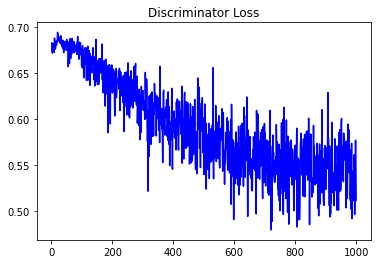

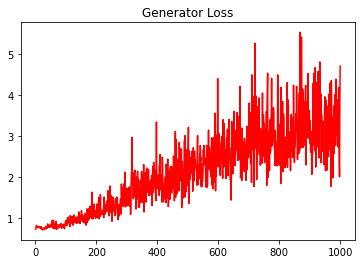

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.23407444464604316


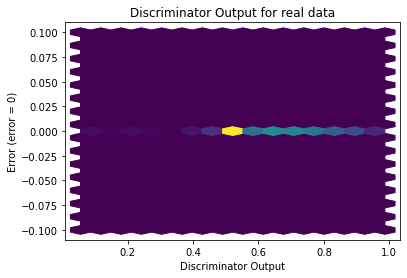

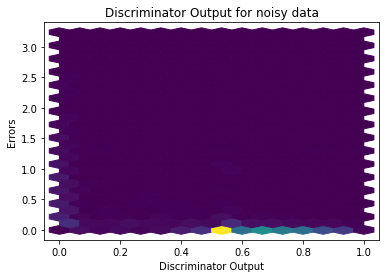

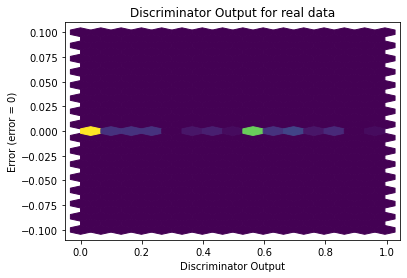

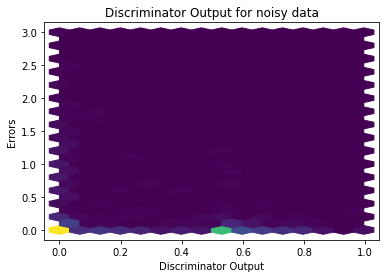

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())